In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.svm import SVR,SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer,MinMaxScaler

from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,GridSearchCV,train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet,Lasso
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
""" In this Notebook, I have converted the features--Parch,SibSp and Age into catagoricial groups. The problem with Age 
as numerical is that there are a lot of missing Age's. The missing Age's imply more not survived people. So I put all of them
in one catagory.
"""

In [2]:
Train_=pd.read_csv('train.csv',index_col=0)
Test_=pd.read_csv('test.csv',index_col=0)
Train=Train_.drop('Survived',axis=1)
Test=Test_.copy()
Merged=Train.append(Test)
DataFrames=[Train,Train_,Test,Merged]
print(Train.shape,Test.shape,Merged.shape)

(891, 10) (418, 10) (1309, 10)


In [3]:
Train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def name_to_title(words):
    Title_list=['Mrs.','Miss.','Master.','Lady.','Dr.','Sir.','Major.','Capt.','Col.','Mr.','Rev.','Don.','Countess.',
             'Mlle.','Ms.','Mme.','Jonkheer.','Dona.']
    for word in words:
        if word in Title_list:
            return word

In [5]:
for DataFrame in DataFrames:
    DataFrame['Name']=DataFrame['Name'].str.split().apply(name_to_title)

In [6]:
Merged.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,Mrs.,female,35.0,1,0,113803,53.1000,C123,S
5,3,Mr.,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(Train['Name'].unique())
print(Merged['Name'].unique())

['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.' 'Dona.']


In [8]:
Train=Train.drop('Ticket',axis=1)
Train_=Train_.drop('Ticket',axis=1)
Test=Test.drop('Ticket',axis=1)
Merged=Merged.drop('Ticket',axis=1)

In [9]:
Train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,Mr.,male,22.0,1,0,7.2500,NaN,S
2,1,Mrs.,female,38.0,1,0,71.2833,C85,C
3,3,Miss.,female,26.0,0,0,7.9250,NaN,S
4,1,Mrs.,female,35.0,1,0,53.1000,C123,S
5,3,Mr.,male,35.0,0,0,8.0500,NaN,S


In [10]:
print('Train',' '*5,'Percentage of missing values\n')
print(Train.isna().sum()/Train.shape[0],'\n')
print('*'*30,'\n')
print('Merged',' '*5,'Percentage of missing values\n')
print(Merged.isna().sum()/Merged.shape[0])

Train       Percentage of missing values

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64 

****************************** 

Merged       Percentage of missing values

Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.200917
SibSp       0.000000
Parch       0.000000
Fare        0.000764
Cabin       0.774637
Embarked    0.001528
dtype: float64


In [11]:
Train=Train.drop('Cabin',axis=1)
Train_=Train_.drop('Cabin',axis=1)
Test=Test.drop('Cabin',axis=1)
Merged=Merged.drop('Cabin',axis=1)

In [12]:
Train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,3,Mr.,male,22.0,1,0,7.2500,S
2,1,Mrs.,female,38.0,1,0,71.2833,C
3,3,Miss.,female,26.0,0,0,7.9250,S
4,1,Mrs.,female,35.0,1,0,53.1000,S
5,3,Mr.,male,35.0,0,0,8.0500,S


In [13]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


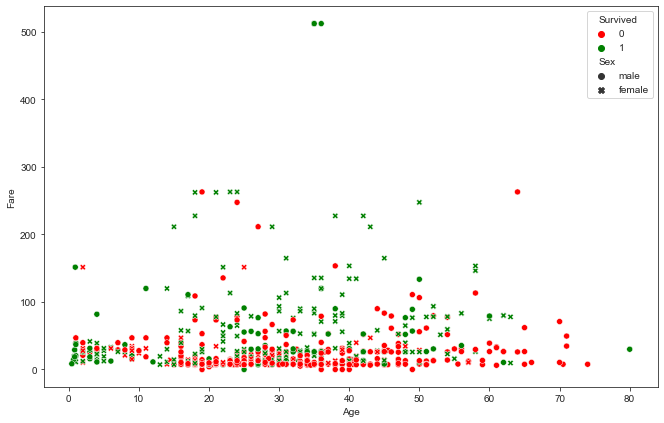

In [14]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Age',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()

Notes:
    Kids survived mostly
    women survived mostly
    wealthy women survived mostly
    Even wealthy men died, except for two of them
    Very old people died, there is one outlier

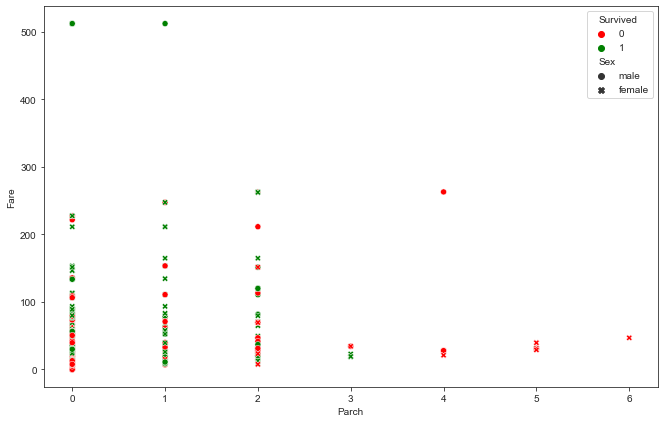

The number of people in Parch=3 catagory:  5
The number of people in Parch=3 catagory and survived:  3


In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Parch',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()
T1=Train_[Train_['Parch']==3]
T2=T1[T1['Survived']==1]
print('The number of people in Parch=3 catagory: ',T1.shape[0])
print('The number of people in Parch=3 catagory and survived: ',T2.shape[0])

In [16]:
Train.loc[Train['Parch']>=4,'Parch']=4
Train_.loc[Train_['Parch']>=4,'Parch']=4
Test.loc[Test['Parch']>=4,'Parch']=4
Merged.loc[Merged['Parch']>=4,'Parch']=4

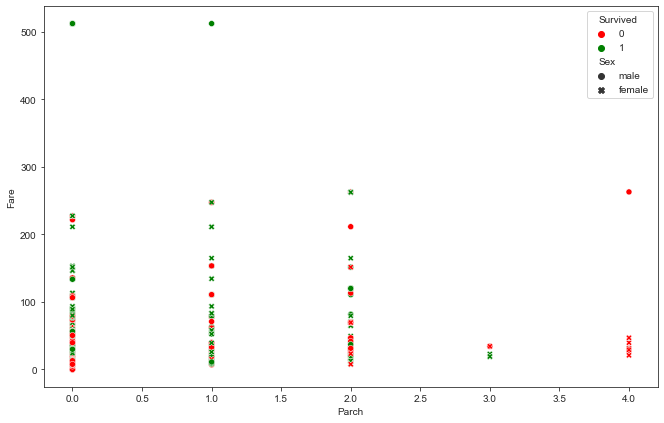

The number of people in Parch=3 catagory:  5
The number of people in Parch=3 catagory and survived:  3


In [17]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Parch',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()
T1=Train_[Train_['Parch']==3]
T2=T1[T1['Survived']==1]
print('The number of people in Parch=3 catagory: ',T1.shape[0])
print('The number of people in Parch=3 catagory and survived: ',T2.shape[0])

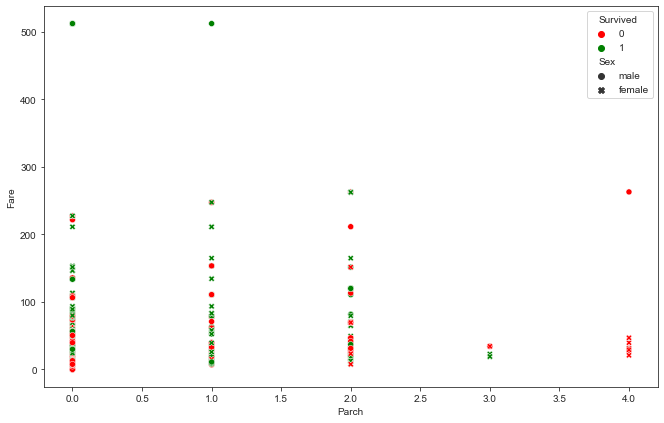

The number of people in Parch=4 catagory:  10
The number of people in Parch=4 catagory and survived:  1


In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Parch',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()
T1=Train_[Train_['Parch']==4]
T2=T1[T1['Survived']==1]
print('The number of people in Parch=4 catagory: ',T1.shape[0])
print('The number of people in Parch=4 catagory and survived: ',T2.shape[0])

In [19]:
Train.loc[Train['SibSp']>=3,'SibSp']=3
Train_.loc[Train_['SibSp']>=3,'SibSp']=3
Test.loc[Test['SibSp']>=3,'SibSp']=3
Merged.loc[Merged['SibSp']>=3,'SibSp']=3

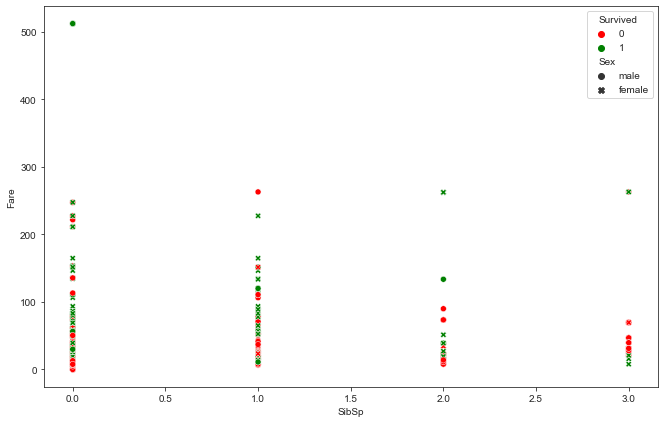

The number of people in SibSp=3 catagory:  46
The number of people in SibSp=3 and survived catagory:  7


In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='SibSp',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()
T1=Train_[Train_['SibSp']==3]
T2=T1[T1['Survived']==1]
print('The number of people in SibSp=3 catagory: ',T1.shape[0])
print('The number of people in SibSp=3 and survived catagory: ',T2.shape[0])

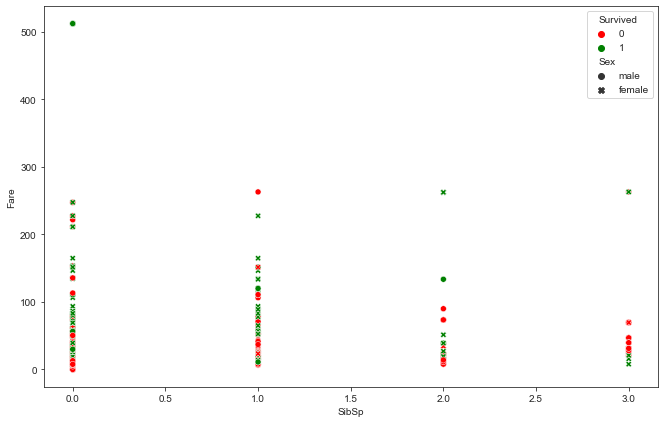

The number of people in SibSp=3 catagory:  46
The number of people in SibSp=3 and survived catagory:  7


In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='SibSp',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()
T1=Train_[Train_['SibSp']==3]
T2=T1[T1['Survived']==1]
print('The number of people in SibSp=3 catagory: ',T1.shape[0])
print('The number of people in SibSp=3 and survived catagory: ',T2.shape[0])

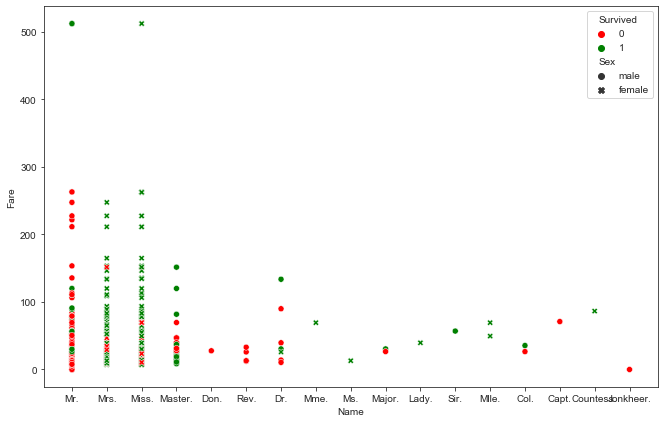

In [22]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Name',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()

In [23]:
Train_.groupby(['Name','Survived'])['Sex'].count()

Name       Survived
Capt.      0             1
Col.       0             1
           1             1
Countess.  1             1
Don.       0             1
Dr.        0             4
           1             3
Jonkheer.  0             1
Lady.      1             1
Major.     0             1
           1             1
Master.    0            17
           1            23
Miss.      0            55
           1           127
Mlle.      1             2
Mme.       1             1
Mr.        0           436
           1            81
Mrs.       0            26
           1            99
Ms.        1             1
Rev.       0             6
Sir.       1             1
Name: Sex, dtype: int64

Title_dict=dict(zip(['Mrs.','Miss.','Master.','Lady.','Dr.','Sir.','Major.','Capt.','Col.','Mr.','Rev.','Don.','Countess.',
    'Mlle.','Ms.','Mme.','Jonkheer.','Dona.'],['Mrs.','Miss.','Master.','W_Live','Master.','Master.','Master.','M_die','Master.','Mr.','M_die','M_die','W_Live',
        'W_Live','W_Live','W_Live','M_die','W_Live']))

In [24]:
Title_dict=dict(zip(['Mrs.','Miss.','Master.','Lady.','Dr.','Sir.','Major.','Capt.','Col.','Mr.','Rev.','Don.','Countess.',
    'Mlle.','Ms.','Mme.','Jonkheer.','Dona.'],['Mrs.','Miss.','Master.','Mrs.','Master.','Master.','Master.','Mr.','Master.','Mr.','Mr.','Mr.','Mrs.',
        'Mrs.','Mrs.','Mrs.','Mr.','Mrs.']))

In [25]:
Train_.groupby('Name').mean()['Survived']

Name
Capt.        0.000000
Col.         0.500000
Countess.    1.000000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
Name: Survived, dtype: float64

In [26]:
Train['Name']=Train['Name'].map(Title_dict)
Train_['Name']=Train_['Name'].map(Title_dict)
Test['Name']=Test['Name'].map(Title_dict)
Merged['Name']=Merged['Name'].map(Title_dict)

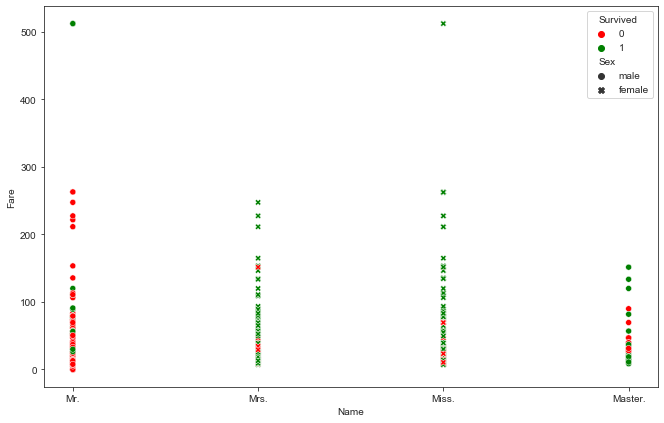

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Name',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()

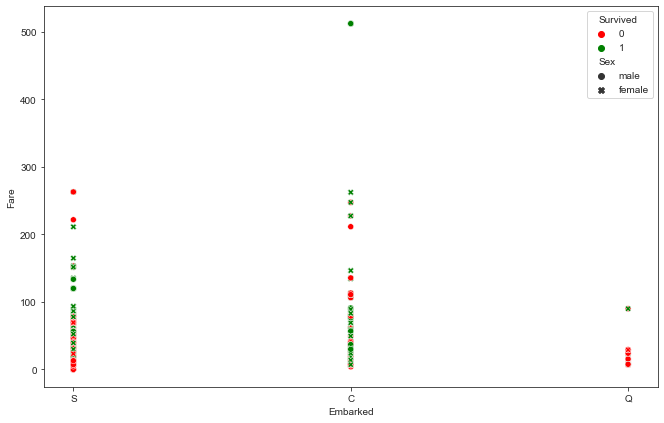

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.scatterplot(x='Embarked',y='Fare',data=Train_,hue='Survived',style='Sex',palette=['red','green'])
plt.show()

In [29]:
Train_.groupby(['Name']).agg(['mean','count'])['Survived']

,mean,count
Name,,
Master.,0.557692,52
Miss.,0.697802,182
Mr.,0.153992,526
Mrs.,0.801527,131


In [30]:
CatCol=['Pclass', 'SibSp', 'Parch']
for i in CatCol:
    Train[i]=Train[i].astype(str).apply(lambda x: i+'_'+x)
    Train_[i]=Train_[i].astype(str).apply(lambda x: i+'_'+x)
    Test[i]=Test[i].astype(str).apply(lambda x: i+'_'+x)  
    Merged[i]=Merged[i].astype(str).apply(lambda x: i+'_'+x) 
Train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,Pclass_3,Mr.,male,22.0,SibSp_1,Parch_0,7.2500,S
2,Pclass_1,Mrs.,female,38.0,SibSp_1,Parch_0,71.2833,C
3,Pclass_3,Miss.,female,26.0,SibSp_0,Parch_0,7.9250,S
4,Pclass_1,Mrs.,female,35.0,SibSp_1,Parch_0,53.1000,S
5,Pclass_3,Mr.,male,35.0,SibSp_0,Parch_0,8.0500,S


In [31]:
Merged.isna().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [32]:
no_age_survived=Train_[(Train_['Age'].isna()) & (Train_['Survived']==1)]
no_age_no_survived=Train_[(Train_['Age'].isna()) & (Train_['Survived']==0)]
age_survived=Train_[(Train_['Age'].notna()) & (Train_['Survived']==1)]
age_no_survived=Train_[(Train_['Age'].notna()) & (Train_['Survived']==0)]

In [33]:
no_age_survived.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
18,1,Pclass_2,Mr.,male,NaN,SibSp_0,Parch_0,13.0000,S
20,1,Pclass_3,Mrs.,female,NaN,SibSp_0,Parch_0,7.2250,C
29,1,Pclass_3,Miss.,female,NaN,SibSp_0,Parch_0,7.8792,Q
32,1,Pclass_1,Mrs.,female,NaN,SibSp_1,Parch_0,146.5208,C
33,1,Pclass_3,Miss.,female,NaN,SibSp_0,Parch_0,7.7500,Q


C:\Users\Dara\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


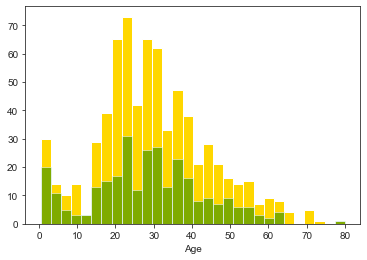

In [34]:
sns.distplot(Train_['Age'], color="gold",bins=30, kde=False, hist_kws={"alpha": 1}) 
sns.distplot(Train_[Train_['Survived']==1]['Age'],bins=30, color="green", kde=False, hist_kws={"alpha":0.5}) 
plt.show()

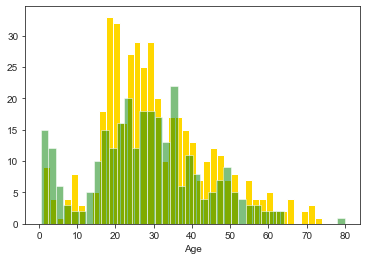

In [35]:
sns.distplot(Train_[Train_['Survived']==0]['Age'], color="gold",bins=40, kde=False, hist_kws={"alpha": 1}) 
sns.distplot(Train_[Train_['Survived']==1]['Age'], color="green",bins=40, kde=False, hist_kws={"alpha":0.5}) 
plt.show()

In [36]:
def age_catagorizer(Age):
    if Age<16:
        return 'A'
    elif Age<50:
        return 'B'
    elif Age< 99:
        return 'C'
    else:
        return 'D'

In [37]:
Train['Age']=Train['Age'].fillna(100).apply(age_catagorizer)
Train_['Age']=Train_['Age'].fillna(100).apply(age_catagorizer)
Test['Age']=Test['Age'].fillna(100).apply(age_catagorizer) 
Merged['Age']=Merged['Age'].fillna(100).apply(age_catagorizer)

In [38]:
Mean_Fare=Train['Fare'].mean()
Train['Fare']=Train['Fare'].fillna(Mean_Fare)
Train_['Fare']=Train_['Fare'].fillna(Mean_Fare)
Test['Fare']=Test['Fare'].fillna(Mean_Fare) 
Merged['Fare']=Merged['Fare'].fillna(Mean_Fare)

In [39]:
DataFrames=[Train,Train_,Test,Merged]
Most_Frequent=Train['Embarked'].value_counts().idxmax()
for DataFrame in DataFrames:
    DataFrame['Embarked']=DataFrame['Embarked'].fillna(Most_Frequent)

In [40]:
Merged.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
X=Merged.iloc[:891]
T=Merged.iloc[891:]
y=Train_['Survived'].values

In [42]:
ConCol=['Fare']
CatCol=list(Merged.columns)
CatCol.remove('Fare')
print(CatCol)

['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [43]:
#sc1=StandardScaler()
TrainContinuous = X[ConCol]
TestContinuous = T[ConCol]

One_Hot = OneHotEncoder().fit(X[CatCol])
TrainCategorical = One_Hot.transform(X[CatCol]).toarray()
TestCategorical = One_Hot.transform(T[CatCol]).toarray()
TrainX = np.hstack((TrainCategorical, TrainContinuous))
TestX = np.hstack((TestCategorical, TestContinuous))

In [44]:
parameters={'n_estimators':[50,100],'learning_rate':[1.0,2.0,0.5,0.2],'max_depth':[1,5],
            'max_features':['auto', 'sqrt', 'log2'], 'min_samples_leaf':[1,5,10],
            'min_samples_split':[2,5,10],'loss':['deviance','exponential']}

In [45]:
GBC=GradientBoostingClassifier()

In [46]:
clf=GridSearchCV(GBC, parameters,verbose=3,cv=3)

In [47]:
clf.fit(TrainX, y)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.835, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.838, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.842, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.791, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.842, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.771, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.842, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.764, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.832, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.838, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.77

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.825, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.811, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.815, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.758, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.791, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.825, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.832, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.78

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.768, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.825, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.811, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, sco

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.822, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.781, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.835, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.835

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.832, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.761, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.832, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, scor

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.781, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.835, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.764, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.785, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.785, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2,

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.771, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.811, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.832, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.815, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.815, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.811, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.774, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.616, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.724, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.384

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.724, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.384, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, s

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.199, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.633, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.660, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.414, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.593, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.273, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.377, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimato

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.704, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.401, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.438, total=   0.3s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.451, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.694, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.670, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.512, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.593, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, sco

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.458, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.495, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.404, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.431

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.660, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.690, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.421, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, scor

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.798, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.768, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.781, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.768, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.785, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.815, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.774, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2,

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.744, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.768, total=   0.3s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.818, total=   0.3s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.811, total=   0.3s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.811, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.788, total=   0.3s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.822, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estim

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.815, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.751, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.771, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.811, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.774, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.801, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.785, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.815, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.805, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.825, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.825

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.805, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, sco

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.842, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.798, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.838, total=   0.3s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.815, total=   0.3s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.815, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.825, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.825, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.822, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.822, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.785, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100,

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.832, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.785, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.815, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.815, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.781, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100,

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.785, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2,

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.781, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.835, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.835, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.835, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.791, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.774, total=   0.3s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.842, total=   0.3s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.828, total=   0.3s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.815, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.805, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.791, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.825, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, 

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.811, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.778, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.791, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.825, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.832, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.801, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.815, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.798, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.835, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.8

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, s

[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.805, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.795, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.815, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.795, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.815, total=   0.3s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.825, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.845, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.835, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.791, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.822, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.791, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimato

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.832, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.781, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.825, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.791, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.801, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.825, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.795, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.822, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, 

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.791, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.832, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.822, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.811, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.795, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.835, total=   0.3s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.3s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.845, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.832, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.778, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_esti

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.785, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.822, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.855, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.842, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.791, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_est

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.778, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.825, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_spl

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  4.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(TrainX, y)

In [51]:
clf.best_params_

{'learning_rate': 0.2,
 'loss': 'exponential',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [52]:
clf.best_score_

0.8294051627384961

In [49]:
print(cross_val_score(clf, TrainX, y, cv=3))

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.848, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.848, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, scor

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.833, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.783, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.843, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estim

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.616, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100,

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.611, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.712, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.384, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.747, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.616, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.61

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.566, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.606, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.571, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.54

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.677, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.530, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.485, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.652, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.652, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.530, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.470

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.636, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.576, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.631, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.727, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.424, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.525, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.707, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.409, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.586, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, sc

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_esti

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.768, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.808, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.808, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estim

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, 

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.838, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, 

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, 

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.854, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100,

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.838, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.843, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.85

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.843, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_est

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.838, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.848, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.833, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, 

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.843, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.859, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.843, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.848, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, 

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_spli

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.768, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.833, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_sam

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.768, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.843, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.763, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.84

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.848, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.763, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.758, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.707, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.7

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.697, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.717, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.747, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.742, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.747, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.758, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.742, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.732, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.732, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.747, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.697, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.747, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.747, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.753, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.828, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.722, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.763, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.758, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.737, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.717, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.662, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.217, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.217, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.662, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, scor

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.338, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.616, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.283, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.616, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.732, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.384, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.399, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.61

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.354, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.636, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.460, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.3

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.480, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.374, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.343, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.672, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.510, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.586, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.6

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.687, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.672, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.419, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.540, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.702, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.540, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, 

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.652, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.712, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.722, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.737, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.753, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_sp

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.742, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.758, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.732, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.753, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.697, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.783, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.753, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.753, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.758, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.768, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.737, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.742, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.783, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.727, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.758, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.773, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.768, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.843

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.737, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, sco

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.697, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.737, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.732, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.747, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.763, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.838, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.773, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.722, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.742, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, 

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.758, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.732, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.737, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.768, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.848, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.763, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.732, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.783, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.843, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, 

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.833, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.768, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.768, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.753, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.773, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.737, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100,

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.753, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.823

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.773, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.843, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.753, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.758, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.717, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.783, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.753, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.763, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100,

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.747, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.732, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estima

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.737, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.773, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.717, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.727, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.732, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.742, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.783, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.838, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.753, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.838, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.737, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_e

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_sam

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, s

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.833, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=

[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.793, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, 

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.763, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estim

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples

[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, 

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.773, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estim

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.773, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.793, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.737, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.753, total=   0.1s
[CV] learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=1.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.616, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.384, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.616, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.288, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.525, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.722, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.384, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.384, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.6

[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.227, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.217, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.384, total=   0.0s
[CV] learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.505, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.702, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.510, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.6

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.520, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.374, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.480, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.525, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.571, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.626, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.687, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.566, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.712, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100,

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.399, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.712, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.586, total=   0.2s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.470, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.540, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.404, total=   0.1s
[CV] learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.813, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_est

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.768, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.763, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.768, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_e

[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.833, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.732, total=   0.0s
[CV] learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.823, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.768, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.758, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.793, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.788, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, 

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.753, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.793, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, 

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.778, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_

[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.737, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=2.0, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.798, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.8

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.818, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.7

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50, 

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100,

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.783, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.773, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=5

[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.763, total=   0.1s
[CV] learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, score=0.803, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.773, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_e

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.768, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=

[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.768, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.818, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.793, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.813, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.793, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.798, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.778, total=   0.2s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_est

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.773, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples

[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.773, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.5, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=50, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, score=0.788, total=   0.0s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, 

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, sc

[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.818, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimato

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.788, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score

[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50, score=0.803, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=deviance, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100,

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.793, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.798, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.818, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=5, min_samples_split=2

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50, score=0.778, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=5

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.823, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=50, score=0.783, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estim

[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=100, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.808, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.828, total=   0.0s
[CV] learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_spli

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_e

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.803, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=auto, min_samples_leaf=10, min_samples

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.813, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.828, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estim

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.783, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50, score=0.823, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_est

[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.778, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.808, total=   0.1s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100, score=0.788, total=   0.2s
[CV] learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=50 
[CV]  learning_rate=0.2, loss=exponential, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, n

[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed:  3.8min finished


In [48]:
sdf=clf.predict(TestX)

In [50]:
#reg=gradient_boosting_regressor.fit(TrainX, y)
Test['Survived']=clf.predict(TestX)
prediction_df=Test[['Survived']]
prediction_df.to_csv('Downloads/Datascience/KaggleStuff/Titanic.csv')